# Auto Regressor Model by Mr. Harshit Dawar
* This is the basic fundamental which should be clear before implementing RNN.
* It is the backbone of the correct/right Forecast which is required by RNN.

## Importing the required Libraries

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

## Generating Sample Data without Noise

In [167]:
timeSeriesData = np.sin(0.1 * np.arange(300))

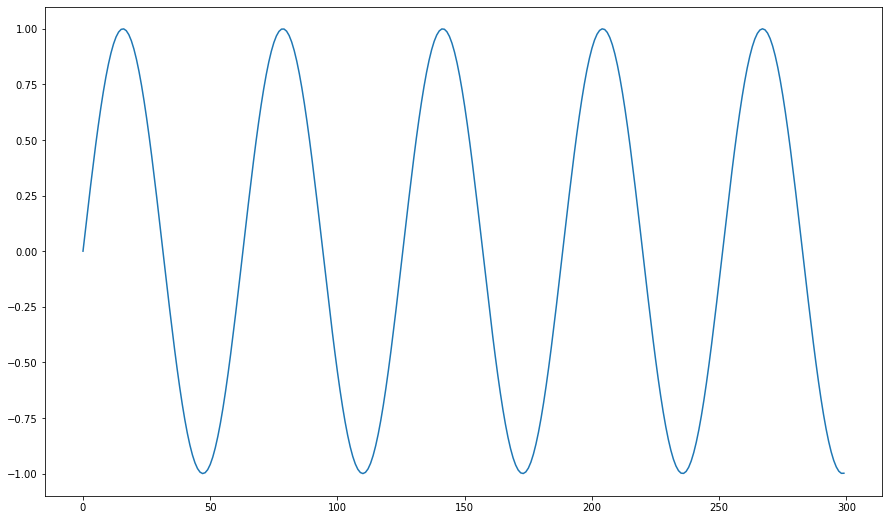

In [168]:
plt.figure(figsize = (15, 9))
plt.plot(timeSeriesData)
plt.show()

### Generating Forecast Data without Noise

In [169]:
T = 10
data = []
forecast = []

for t in range(len(timeSeriesData) - T):
    data.append(timeSeriesData[t : t + T])
    forecast.append(timeSeriesData[t + T])
    
data, forecast  = np.array(data), np.array(forecast)

In [170]:
data.shape, forecast.shape

((290, 10), (290,))

### AutoRegression Model with wrong approach of Forecast

In [171]:
inputShape = Input(shape = (T, ))
outputLayer = Dense(1)(inputShape)

model = Model(inputShape, outputLayer)
model.compile(loss = "mse", optimiser = Adam(lr = 0.001))

In [172]:
trainedModel = model.fit(data[:data.shape[0] // 2],
                         forecast[:forecast.shape[0] // 2],
                         epochs = 100,
                         validation_data = (data[-data.shape[0] // 2 : ], forecast[-forecast.shape[0] // 2 : ])
                    )

Train on 145 samples, validate on 145 samples
Epoch 1/100
145/145 [==============================] - 1s 7ms/sample - loss: 0.3924 - val_loss: 0.4243
Epoch 2/100
145/145 [==============================] - 0s 993us/sample - loss: 0.3738 - val_loss: 0.4101
Epoch 3/100
145/145 [==============================] - 0s 884us/sample - loss: 0.3613 - val_loss: 0.3980
Epoch 4/100
145/145 [==============================] - 0s 876us/sample - loss: 0.3512 - val_loss: 0.3874
Epoch 5/100
145/145 [==============================] - 0s 870us/sample - loss: 0.3416 - val_loss: 0.3782
Epoch 6/100
145/145 [==============================] - 0s 943us/sample - loss: 0.3331 - val_loss: 0.3690
Epoch 7/100
145/145 [==============================] - 0s 662us/sample - loss: 0.3249 - val_loss: 0.3598
Epoch 8/100
145/145 [==============================] - 0s 693us/sample - loss: 0.3165 - val_loss: 0.3505
Epoch 9/100
145/145 [==============================] - 0s 727us/sample - loss: 0.3086 - val_loss: 0.3415
Epoch 10/10

145/145 [==============================] - 0s 833us/sample - loss: 0.0058 - val_loss: 0.0059
Epoch 79/100
145/145 [==============================] - 0s 820us/sample - loss: 0.0049 - val_loss: 0.0050
Epoch 80/100
145/145 [==============================] - 0s 602us/sample - loss: 0.0041 - val_loss: 0.0041
Epoch 81/100
145/145 [==============================] - 0s 588us/sample - loss: 0.0034 - val_loss: 0.0033
Epoch 82/100
145/145 [==============================] - 0s 726us/sample - loss: 0.0027 - val_loss: 0.0026
Epoch 83/100
145/145 [==============================] - 0s 733us/sample - loss: 0.0021 - val_loss: 0.0021
Epoch 84/100
145/145 [==============================] - 0s 576us/sample - loss: 0.0017 - val_loss: 0.0016
Epoch 85/100
145/145 [==============================] - 0s 580us/sample - loss: 0.0013 - val_loss: 0.0012
Epoch 86/100
145/145 [==============================] - 0s 577us/sample - loss: 9.0457e-04 - val_loss: 8.2218e-04
Epoch 87/100
145/145 [=============================

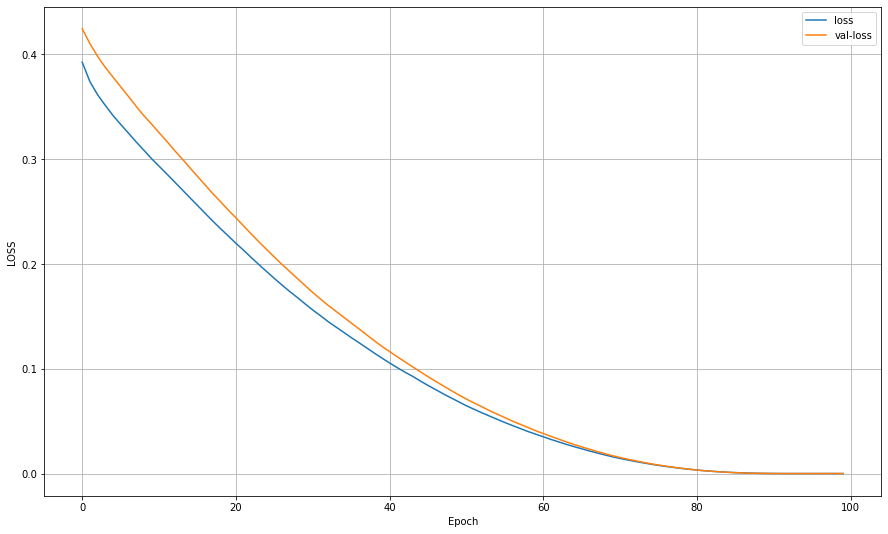

In [173]:
plt.figure(figsize = (15,9))
plt.plot(trainedModel.history["loss"], label = "loss")
plt.plot(trainedModel.history["val_loss"], label = "val-loss")
plt.xlabel("Epoch")
plt.ylabel("LOSS")
plt.legend()
plt.grid()
plt.show()

In [174]:
predictionsTargetValues = forecast[-forecast.shape[0] // 2 : ]
predictions = []

### Using the wrong approach for Forecast

In [175]:
iterator = data.shape[0] // 2
while len(predictions) < len(predictionsTargetValues):
    predictions.append(
        model.predict(data[iterator].reshape(1, -1))[0, 0]      # Converting from (10, 1) to (1, 10) becuase 10 features are expected by the Model
    )
    iterator += 1
    

In [176]:
# model.predict(data[0].reshape(1, -1))[0][0]

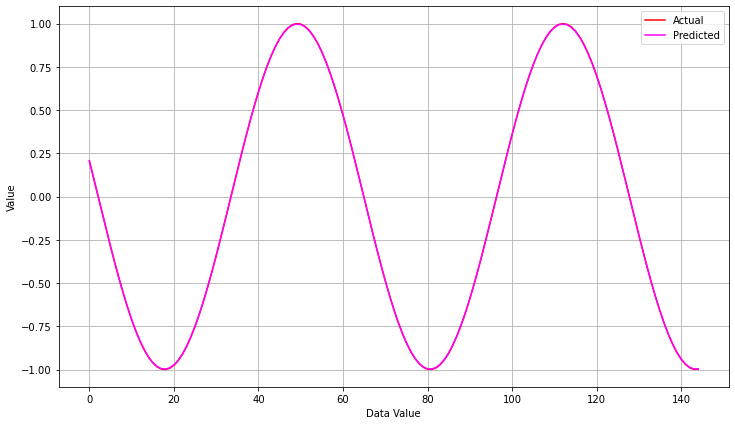

In [177]:
plt.figure(figsize = (12, 7))
plt.plot(predictionsTargetValues, label = "Actual", c = "red")
plt.plot(predictions, label = "Predicted", c = 'magenta')
plt.legend()
plt.grid()
plt.xlabel("Data Value")
plt.ylabel("Value")
plt.show()

### Using the Right forecast Approach

In [182]:
predictionsTargetValues = forecast[-forecast.shape[0] // 2 : ]
predictions = []

last_Value_Of_Data = data[-data.shape[0] // 2]
while len(predictions) < len(predictionsTargetValues):
    
    # Converting from (10, 1) to (1, 10) becuase 10 features are expected by the Model
    temp = model.predict(last_Value_Of_Data.reshape(1, -1))[0, 0]
    predictions.append(temp)
        
    # Shifting the 1st 10 predictions to left by 1 bit, & adding the prediction obtained by the model at the end
    last_Value_Of_Data = np.roll(last_Value_Of_Data, -1)
    last_Value_Of_Data[-1] = temp

In [183]:
model.predict(last_Value_Of_Data.reshape(1, -1))

array([[-0.96736723]], dtype=float32)

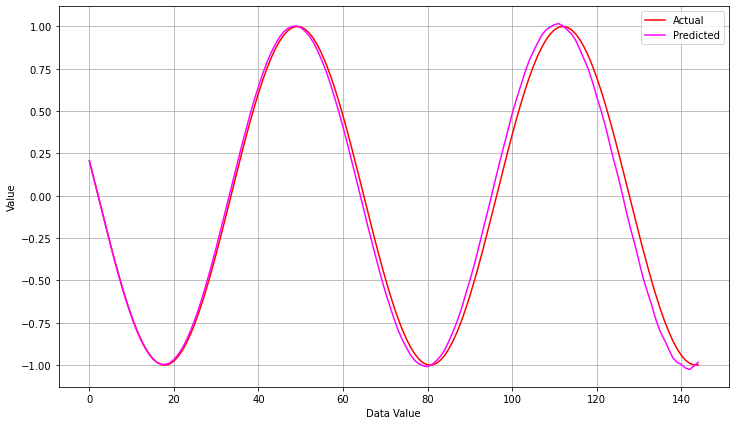

In [186]:
plt.figure(figsize = (12, 7))
plt.plot(predictionsTargetValues, label = "Actual", c = "red")
plt.plot(predictions, label = "Predicted", c = 'magenta')
plt.legend()
plt.grid()
plt.xlabel("Data Value")
plt.ylabel("Value")
plt.show()

#### Here, it can be easily spotted that when we use the right apporach, result differs! To make it more clear, one more example below is shown which will elaborate the differene between these appraoches to a more granular level by using the noisy data.

## Data with Noise

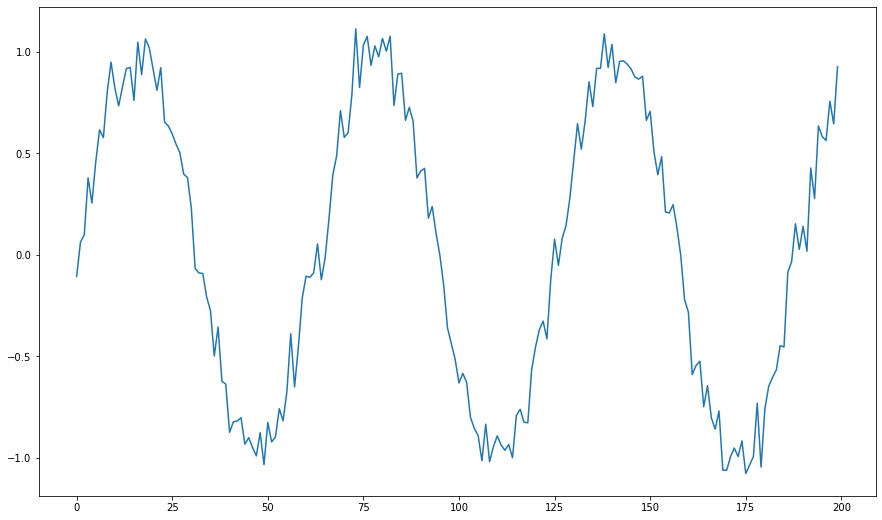

In [203]:
timeSeriesData = np.sin(0.1 * np.arange(200)) + np.random.randn(200) * 0.1
plt.figure(figsize = (15, 9))
plt.plot(timeSeriesData)
plt.show()

In [204]:
T = 10
data = []
forecast = []

for t in range(len(timeSeriesData) - T):
    data.append(timeSeriesData[t : t + T])
    forecast.append(timeSeriesData[t + T])
    
data, forecast  = np.array(data), np.array(forecast)

In [205]:
inputShape = Input(shape = (T, ))
outputLayer = Dense(1)(inputShape)

model = Model(inputShape, outputLayer)
model.compile(loss = "mse", optimiser = Adam(lr = 0.001))

In [206]:
trainedModel = model.fit(data[:data.shape[0] // 2],
                         forecast[:forecast.shape[0] // 2],
                         epochs = 100,
                         validation_data = (data[-data.shape[0] // 2 : ], forecast[-forecast.shape[0] // 2 : ])
                    )

Train on 95 samples, validate on 95 samples
Epoch 1/100
95/95 [==============================] - 1s 15ms/sample - loss: 1.5768 - val_loss: 1.5774
Epoch 2/100
95/95 [==============================] - 0s 1ms/sample - loss: 1.4733 - val_loss: 1.5053
Epoch 3/100
95/95 [==============================] - 0s 1ms/sample - loss: 1.4037 - val_loss: 1.4452
Epoch 4/100
95/95 [==============================] - 0s 1ms/sample - loss: 1.3451 - val_loss: 1.3923
Epoch 5/100
95/95 [==============================] - 0s 1ms/sample - loss: 1.2920 - val_loss: 1.3432
Epoch 6/100
95/95 [==============================] - 0s 1ms/sample - loss: 1.2427 - val_loss: 1.2969
Epoch 7/100
95/95 [==============================] - 0s 1ms/sample - loss: 1.1960 - val_loss: 1.2525
Epoch 8/100
95/95 [==============================] - 0s 2ms/sample - loss: 1.1516 - val_loss: 1.2103
Epoch 9/100
95/95 [==============================] - 0s 1ms/sample - loss: 1.1091 - val_loss: 1.1695
Epoch 10/100
95/95 [==========================

95/95 [==============================] - 0s 2ms/sample - loss: 0.0366 - val_loss: 0.0346
Epoch 81/100
95/95 [==============================] - 0s 3ms/sample - loss: 0.0361 - val_loss: 0.0340
Epoch 82/100
95/95 [==============================] - 0s 2ms/sample - loss: 0.0358 - val_loss: 0.0336
Epoch 83/100
95/95 [==============================] - 0s 3ms/sample - loss: 0.0352 - val_loss: 0.0330
Epoch 84/100
95/95 [==============================] - 0s 3ms/sample - loss: 0.0351 - val_loss: 0.0327
Epoch 85/100
95/95 [==============================] - 0s 1ms/sample - loss: 0.0345 - val_loss: 0.0320
Epoch 86/100
95/95 [==============================] - 0s 1ms/sample - loss: 0.0343 - val_loss: 0.0315
Epoch 87/100
95/95 [==============================] - 0s 1ms/sample - loss: 0.0339 - val_loss: 0.0311
Epoch 88/100
95/95 [==============================] - 0s 2ms/sample - loss: 0.0335 - val_loss: 0.0308
Epoch 89/100
95/95 [==============================] - 0s 2ms/sample - loss: 0.0332 - val_loss: 

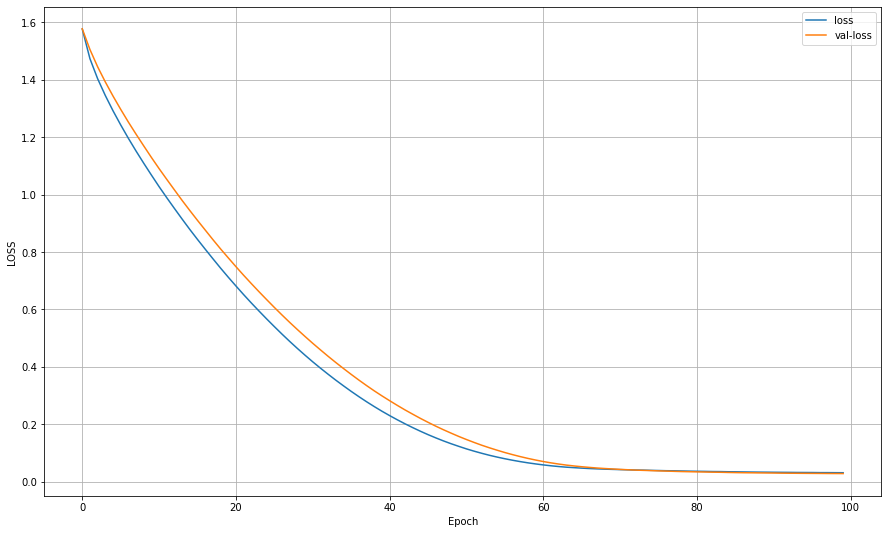

In [207]:
plt.figure(figsize = (15,9))
plt.plot(trainedModel.history["loss"], label = "loss")
plt.plot(trainedModel.history["val_loss"], label = "val-loss")
plt.xlabel("Epoch")
plt.ylabel("LOSS")
plt.legend()
plt.grid()
plt.show()

## Using the wrong Forecast Approach

In [209]:
predictionsTargetValues = forecast[-forecast.shape[0] // 2 : ]
predictions = []
iterator = data.shape[0] // 2
while len(predictions) < len(predictionsTargetValues):
    predictions.append(
        model.predict(data[iterator].reshape(1, -1))[0, 0]      # Converting from (10, 1) to (1, 10) becuase 10 features are expected by the Model
    )
    iterator += 1
    

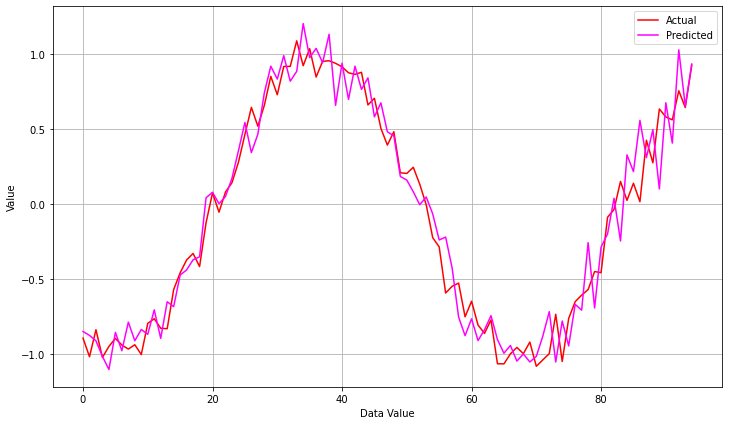

In [210]:
plt.figure(figsize = (12, 7))
plt.plot(predictionsTargetValues, label = "Actual", c = "red")
plt.plot(predictions, label = "Predicted", c = 'magenta')
plt.legend()
plt.grid()
plt.xlabel("Data Value")
plt.ylabel("Value")
plt.show()

## Using the right Forecast Approach

In [211]:
predictionsTargetValues = forecast[-forecast.shape[0] // 2 : ]
predictions = []

last_Value_Of_Data = data[-data.shape[0] // 2]
while len(predictions) < len(predictionsTargetValues):
    
    # Converting from (10, 1) to (1, 10) becuase 10 features are expected by the Model
    temp = model.predict(last_Value_Of_Data.reshape(1, -1))[0, 0]
    predictions.append(temp)
        
    # Shifting the 1st 10 predictions to left by 1 bit, & adding the prediction obtained by the model at the end
    last_Value_Of_Data = np.roll(last_Value_Of_Data, -1)
    last_Value_Of_Data[-1] = temp

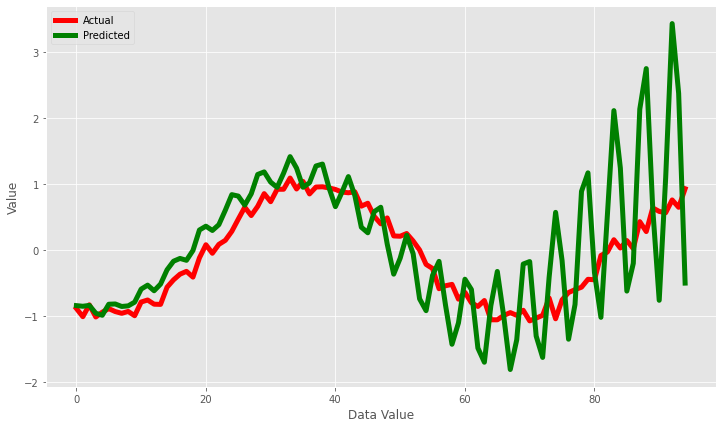

In [220]:
plt.style.use("ggplot")
plt.figure(figsize = (12, 7))
plt.plot(predictionsTargetValues, label = "Actual", c = "red", linestyle = "solid", linewidth = 5)
plt.plot(predictions, label = "Predicted", c = 'green', linestyle = "solid", linewidth = 5)
plt.legend()
plt.xlabel("Data Value")
plt.ylabel("Value")
plt.show()

# I believe now the concept is clear! Congratulations, you have understood another amazing concept which is very crucial for forecasting!